# Zindi Regression Hackathon

Alta Saunders

## Aim
Predict the time of delivery of products from the pick-up time of product by drivers. Predictions are made on pick-up times (as logged by drivers) and then the time it takes for product to be delivered (should be supplied in seconds). The output should therefor consist out of 2 columns: order_id and Time from Pickup to Arrival and should correspond with every order placed. 

## Supplied Datasets
The following datasets are supplied:
- train.csv (should be used to train data)
- test.csv (should be used to test data and excludes arrival times)
- Riders.csv (information about rider statistics and information)


## Importing an viewing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Ensure that pathway to datasets are accurate since this will differ depending on where data is stored.

In [2]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')
df_riders = pd.read_csv('Riders.csv')

View the first 5 lines of each datase

In [3]:
df_train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [4]:
df_test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [5]:
df_riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [6]:
#Join train and rider datasets based on the RiderID
df_combined = pd.merge(df_train,df_riders,on='Rider Id',how='left')

#view new dataframe
df_combined.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533


In [7]:
df_riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


Some columns can be removed since it is redundant. This includes user_id, vehicle type, placement dates and times, confirmation dates and times, arival at pick dates and times, and arival at destination times (we already have the time from pickup to arrival which is what we want to predict). 

We can also check iof the Time from Pickup to Arrival is more than 86400 (seconds in a day). If all packages were delivered on the same day as pickup (which is most likely the case since all deliveries were made via bike), we can then also remove Pickup date and only use the time (only thing needed for prediction). It is important to keep the weekday information since delivery times might be influenced depending on whether it is a week day or weekend. 

We should then convert the time variable into seconds (which will make things easier since our output is in seconds and it is easier to process seconds compare to a H:M:S input. 

In [8]:
#see is Time from pickup to arrival is more than 86400 (seconds in a day)
df_combined['Time from Pickup to Arrival'].max()

7883

In [9]:
#remove columns
df = df_combined.drop(['Order No', 'User Id', 'Vehicle Type', 'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
                      'Placement - Time','Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)','Confirmation - Time',
                      'Arrival at Pickup - Day of Month', 'Arrival at Pickup - Weekday (Mo = 1)','Arrival at Pickup - Time',
                      'Arrival at Destination - Day of Month', 'Arrival at Destination - Weekday (Mo = 1)',
                      'Arrival at Destination - Time', 'Pickup - Day of Month', 'Rider Id'], axis=1)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 16 columns):
Platform Type                   21201 non-null int64
Personal or Business            21201 non-null object
Pickup - Weekday (Mo = 1)       21201 non-null int64
Pickup - Time                   21201 non-null object
Distance (KM)                   21201 non-null int64
Temperature                     16835 non-null float64
Precipitation in millimeters    552 non-null float64
Pickup Lat                      21201 non-null float64
Pickup Long                     21201 non-null float64
Destination Lat                 21201 non-null float64
Destination Long                21201 non-null float64
Time from Pickup to Arrival     21201 non-null int64
No_Of_Orders                    21201 non-null int64
Age                             21201 non-null int64
Average_Rating                  21201 non-null float64
No_of_Ratings                   21201 non-null int64
dtypes: float64(7), int64(7),

In [11]:
#remove
df.head()

,Platform Type,Personal or Business,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,3,Business,5,10:27:30 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549
1,3,Personal,5,11:44:09 AM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,1993,396,339,13.6,69
2,3,Business,2,12:53:03 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,455,1023,242,12.5,114
3,3,Business,5,9:43:06 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,1341,886,283,14.5,113
4,1,Personal,1,10:05:23 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,1214,2311,872,14.1,533


In [12]:
#no convert pickup time to seconds
#I just want to comment that I really struggle with date times and that I am aware that this code is messy. 

from datetime import datetime
from datetime import time

time_1 = [str(x) for x in df_train['Pickup - Time']]
new_time = []
time_2 = []
time_seconds = []

for x in time_1:
    new_time.append(datetime.strptime(x, "%I:%M:%S %p"))
for x in new_time:
    time_2.append(x.time().strftime("%H:%M:%S"))
for x in time_2:  
    time_seconds.append(sum(int(x) * 60 ** i for i, x in enumerate(reversed(x.split(':')))))


In [13]:
#add new column to df with seconds
df['Pickup - Seconds'] = time_seconds
df_clean = df.drop('Pickup - Time', axis = 1)
df_clean.head()

,Platform Type,Personal or Business,Pickup - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Pickup - Seconds
0,3,Business,5,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549,37650
1,3,Personal,5,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,1993,396,339,13.6,69,42249
2,3,Business,2,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,455,1023,242,12.5,114,46383
3,3,Business,5,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,1341,886,283,14.5,113,34986
4,1,Personal,1,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,1214,2311,872,14.1,533,36323


Now that we have our dataframe we have to make sure all catagorical data is listed as strings and not read as numeric values. This includes 'Personal or Business', 'Platform Type' and .Pickup - Weekday'.

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 16 columns):
Platform Type                   21201 non-null int64
Personal or Business            21201 non-null object
Pickup - Weekday (Mo = 1)       21201 non-null int64
Distance (KM)                   21201 non-null int64
Temperature                     16835 non-null float64
Precipitation in millimeters    552 non-null float64
Pickup Lat                      21201 non-null float64
Pickup Long                     21201 non-null float64
Destination Lat                 21201 non-null float64
Destination Long                21201 non-null float64
Time from Pickup to Arrival     21201 non-null int64
No_Of_Orders                    21201 non-null int64
Age                             21201 non-null int64
Average_Rating                  21201 non-null float64
No_of_Ratings                   21201 non-null int64
Pickup - Seconds                21201 non-null int64
dtypes: float64(7), int64(8), 

In [15]:
#change datatypes to catagorical type

df_clean['Platform Type'] = df_clean['Platform Type'].apply(str)
df_clean['Personal or Business'] = df_clean['Personal or Business'].astype(str)
df_clean['Pickup - Weekday (Mo = 1)'] = df_clean['Pickup - Weekday (Mo = 1)'].astype(str)


#now let see how it changed
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 16 columns):
Platform Type                   21201 non-null object
Personal or Business            21201 non-null object
Pickup - Weekday (Mo = 1)       21201 non-null object
Distance (KM)                   21201 non-null int64
Temperature                     16835 non-null float64
Precipitation in millimeters    552 non-null float64
Pickup Lat                      21201 non-null float64
Pickup Long                     21201 non-null float64
Destination Lat                 21201 non-null float64
Destination Long                21201 non-null float64
Time from Pickup to Arrival     21201 non-null int64
No_Of_Orders                    21201 non-null int64
Age                             21201 non-null int64
Average_Rating                  21201 non-null float64
No_of_Ratings                   21201 non-null int64
Pickup - Seconds                21201 non-null int64
dtypes: float64(7), int64(6)

Before we start modelling, we need to ensure that all catagorical data is listed as dummy variables. We also see that temperature and percipitation have NaNs. We want to fill NaNs with 0.

In [16]:
#we also want to ensure that all nans are filled with 0
df_clean = df_clean.fillna(0)

#lets create dummy variables for all our dataframe
#remember to use the drop_first = True to ensure that we can create n-1 for each dummy variable
df_dummies = pd.get_dummies(df_clean, drop_first = True)

#lets view the head of this dummy dataframe
df_dummies.head()

,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,...,Platform Type_2,Platform Type_3,Platform Type_4,Personal or Business_Personal,Pickup - Weekday (Mo = 1)_2,Pickup - Weekday (Mo = 1)_3,Pickup - Weekday (Mo = 1)_4,Pickup - Weekday (Mo = 1)_5,Pickup - Weekday (Mo = 1)_6,Pickup - Weekday (Mo = 1)_7
0,4,20.4,0.0,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,...,0,1,0,0,0,0,0,1,0,0
1,16,26.4,0.0,-1.351453,36.899315,-1.295004,36.814358,1993,396,339,...,0,1,0,1,0,0,0,1,0,0
2,3,0.0,0.0,-1.308284,36.843419,-1.300921,36.828195,455,1023,242,...,0,1,0,0,1,0,0,0,0,0
3,9,19.2,0.0,-1.281301,36.832396,-1.257147,36.795063,1341,886,283,...,0,1,0,0,0,0,0,1,0,0
4,9,15.4,0.0,-1.266597,36.792118,-1.295041,36.809817,1214,2311,872,...,0,0,0,1,0,0,0,0,0,0


## Correlations

Lets have a look to see if there is any significant correlations between variables

In [17]:
#lets reorder or dataframe so that our dependant variable is at the end

column_titles = [col for col in df_dummies.columns if col!= 'Time from Pickup to Arrival'] + ['Time from Pickup to Arrival']
df_dummies=df_dummies.reindex(columns=column_titles)

In [18]:
#lets view the correlation matrix 
df_dummies.corr()

,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,...,Platform Type_3,Platform Type_4,Personal or Business_Personal,Pickup - Weekday (Mo = 1)_2,Pickup - Weekday (Mo = 1)_3,Pickup - Weekday (Mo = 1)_4,Pickup - Weekday (Mo = 1)_5,Pickup - Weekday (Mo = 1)_6,Pickup - Weekday (Mo = 1)_7,Time from Pickup to Arrival
Distance (KM),1.000000,0.006204,-0.001761,-0.124338,0.178537,-0.079366,0.135397,0.037186,0.036239,-0.008200,...,0.006788,0.020021,-0.007177,-0.006477,0.004816,-0.015515,-0.005056,0.011724,0.030853,0.580608
Temperature,0.006204,1.000000,-0.005017,0.008544,0.012116,-0.000721,-0.000626,0.064350,0.106386,-0.006475,...,-0.033177,0.002058,0.028662,-0.001037,0.022906,-0.017647,0.017611,-0.025766,0.017697,0.018358
Precipitation in millimeters,-0.001761,-0.005017,1.000000,-0.005395,-0.007141,-0.001703,0.006729,0.012714,0.012079,-0.000432,...,-0.013018,-0.001429,0.008823,0.077253,-0.015736,-0.015423,-0.013167,-0.012732,-0.005508,0.005495
Pickup Lat,-0.124338,0.008544,-0.005395,1.000000,-0.147629,0.114975,0.051399,-0.018190,0.002481,0.043610,...,0.003643,-0.031689,-0.022352,0.004828,-0.009185,0.009309,0.007839,-0.021099,0.008891,-0.053823
Pickup Long,0.178537,0.012116,-0.007141,-0.147629,1.000000,0.014992,0.082803,0.011274,-0.001656,-0.001885,...,0.028166,0.013332,-0.036729,-0.009653,0.003624,-0.008813,-0.000373,0.033362,-0.016928,0.060285
Destination Lat,-0.079366,-0.000721,-0.001703,0.114975,0.014992,1.000000,0.046767,-0.001135,0.009552,0.030488,...,0.002149,0.010052,-0.006672,0.007509,-0.005982,-0.006686,-0.011362,0.008276,0.019927,-0.061872
Destination Long,0.135397,-0.000626,0.006729,0.051399,0.082803,0.046767,1.000000,-0.013809,-0.018235,0.002017,...,0.052385,-0.003055,-0.063084,-0.006776,0.002683,0.002545,-0.012797,0.006439,0.015414,0.070425
No_Of_Orders,0.037186,0.064350,0.012714,-0.018190,0.011274,-0.001135,-0.013809,1.000000,0.669036,0.051375,...,0.026286,0.001239,-0.029981,0.005400,0.013627,-0.000691,-0.011322,-0.029803,0.004933,-0.041608
Age,0.036239,0.106386,0.012079,0.002481,-0.001656,0.009552,-0.018235,0.669036,1.000000,-0.014348,...,-0.078672,0.010488,0.071117,-0.007640,0.015558,0.004047,-0.005540,-0.027755,0.005128,-0.007969
Average_Rating,-0.008200,-0.006475,-0.000432,0.043610,-0.001885,0.030488,0.002017,0.051375,-0.014348,1.000000,...,-0.015150,0.000083,0.016044,0.009897,0.001718,0.010002,-0.014144,-0.002103,-0.005824,-0.042559


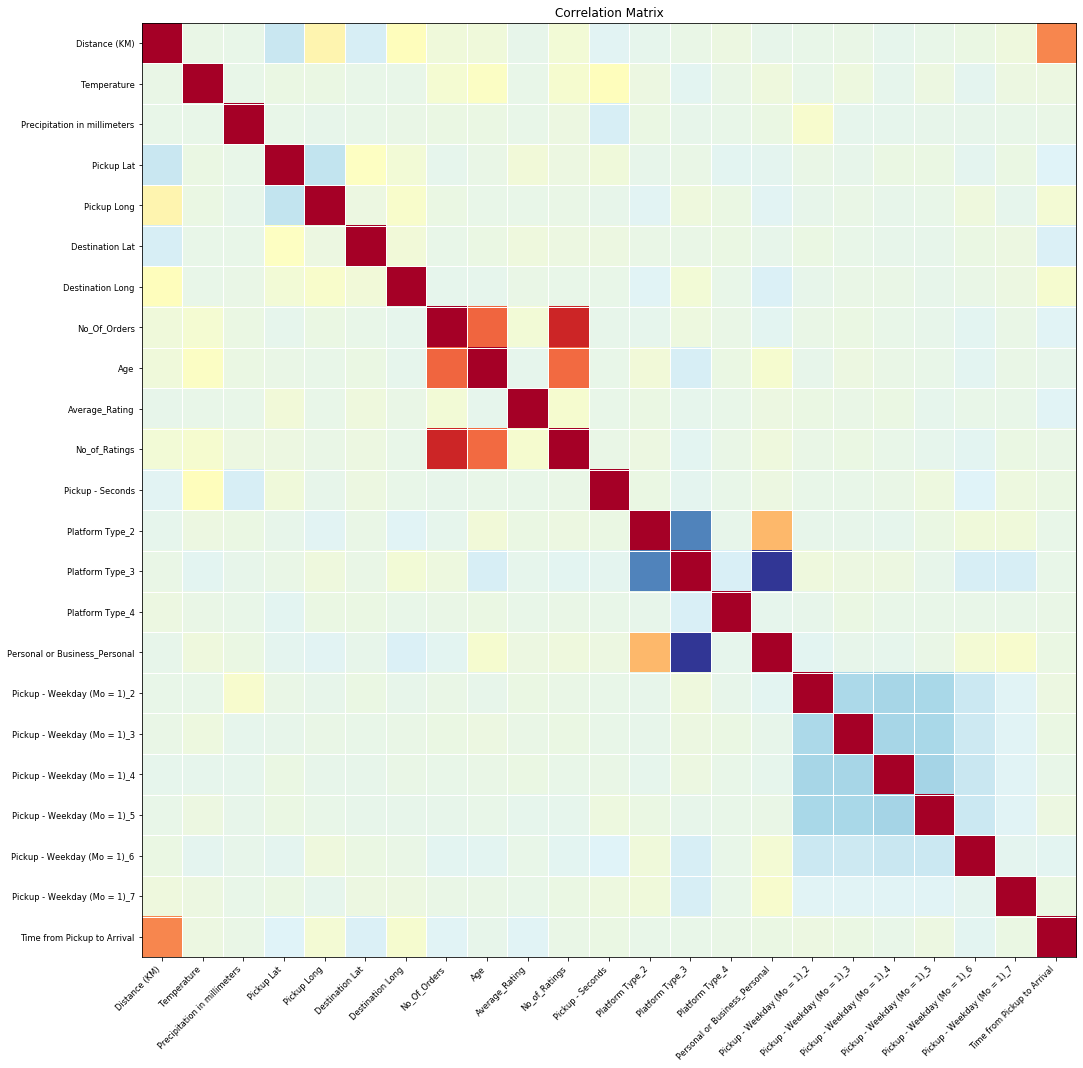

In [19]:
#lets view the correlation matrix in a heatmap. This will help us to see correlations easier
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_dummies.corr(), xnames = df_dummies.corr().columns, ax = ax);

From above we see that the Distance that a driver has to travel has a very significant effect on the time it takes for a delivery to arrive. We also have colinearity issues (No_orders and Age),(Bussiness or Personal) and Platform type use.

In [20]:
#lets get the significant p-values for our dataframe
cor = df_dummies.corr()['Time from Pickup to Arrival'].sort_values(ascending=False)

In [21]:
from scipy.stats import pearsonr

dict_p = {}

column_titles = [col for col in cor.index if col!= 'Time from Pickup to Arrival']
for col in column_titles:
    p_val = round(pearsonr(df_dummies[col], df_dummies['Time from Pickup to Arrival'])[1],6)
    dict_p[col] = {'Correlation_Coefficient':cor[col],
                    'P_Value':p_val}
    
df_p = pd.DataFrame(dict_p).T
df_p_sorted = df_p.sort_values('P_Value')
df_p_sorted[df_p_sorted['P_Value']<0.1]

df_corr = df_p.fillna(0)

df_corr


,Correlation_Coefficient,P_Value
Distance (KM),0.580608,0.000000
Destination Long,0.070425,0.000000
Pickup Long,0.060285,0.000000
Pickup - Weekday (Mo = 1)_5,0.018667,0.006565
Temperature,0.018358,0.007515
Pickup - Weekday (Mo = 1)_2,0.016140,0.018766
Personal or Business_Personal,0.013354,0.051848
Pickup - Weekday (Mo = 1)_7,0.012018,0.080153
Pickup - Seconds,0.011770,0.086568
Pickup - Weekday (Mo = 1)_3,0.007819,0.254917


From above we can see that Distance, No_of_orders, Average_rating, The Pickup-weekdat and Temperature have significant affects on the Time to arrival.

Now we can remove variables that are not significantly correlated to the dataframe and see if this makes a difference. We also need to make sure there is no auto correlation

In [22]:
#lets set the y and X data of only the significant variables
y_cor_data = df_dummies['Time from Pickup to Arrival'] 

#lets keep all variables that are significantly correlated
X_names = list(df_p[df_corr['P_Value'] < 0.05].index)
X_cor_data = df_dummies[X_names]


In [23]:
X_names

['Distance (KM)',
 'Destination Long',
 'Pickup Long',
 'Pickup - Weekday (Mo = 1)_5',
 'Temperature',
 'Pickup - Weekday (Mo = 1)_2',
 'Pickup - Weekday (Mo = 1)_6',
 'No_Of_Orders',
 'Average_Rating',
 'Pickup Lat',
 'Destination Lat']

## Data scaling

Before we start modelling we should scale allour predictor variables. But first lets split our data into a training and test dataset.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
#lets set our X and Y variables on all data
x = df_dummies.drop('Time from Pickup to Arrival', axis=1)
y = df['Time from Pickup to Arrival']

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
#we can try the two different scales to see if it makes a difference
scaler = StandardScaler()

#scale X variables
x_train_scaled = scaler.fit_transform(x)

#Change scaled variables into dataframe
x_standard = pd.DataFrame(x_train_scaled, columns = x.columns)

df_standard = x_standard.fillna(0)

x_train, x_test, y_train, y_test = (train_test_split(df_standard,y, test_size = 0.3, random_state = 50))

In [28]:
#we need to scale the x_cor_data as well

#scale X variables
x_cor_scaled = scaler.fit_transform(X_cor_data)

#Change scaled variables into dataframe
x_cor_standard = pd.DataFrame(x_cor_scaled, columns = X_cor_data.columns)

df_cor_standard = x_cor_standard.fillna(0)

x_cor_train, x_cor_test, y_cor_train, y_cor_test = (train_test_split(df_cor_standard,y, test_size = 0.3, random_state = 50))

## Modelling data

Let's model some of the data now and see RMSE values before we try and regulize or reduce variables

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [30]:
#linear regression 
lm = LinearRegression()

lm.fit(x_train,y_train)
y_lm_predict = lm.predict(x_test)

#decision Tree
regr_tree = DecisionTreeRegressor(max_depth = 15, random_state = 30)

regr_tree.fit(x_train, y_train)
y_rt_predict = regr_tree.predict(x_test)

#random forest
RF = RandomForestRegressor(n_estimators=100, max_depth=15,random_state = 50)

RF.fit(x_train,y_train)
y_RF_predict = RF.predict(x_test)


In [31]:
#now lets repeat it with the correlated data
#linear regression 
lm_cor = LinearRegression()

lm_cor.fit(x_cor_train,y_cor_train)
y_lm_cor_predict = lm_cor.predict(x_cor_test)

#decision Tree
regr_tree_cor = DecisionTreeRegressor(max_depth = 15, random_state = 30)

regr_tree_cor.fit(x_cor_train, y_cor_train)
y_rt_cor_predict = regr_tree_cor.predict(x_cor_test)

#random forest
RF_cor = RandomForestRegressor(n_estimators=100, max_depth=15,random_state = 50)

RF_cor.fit(x_cor_train,y_cor_train)
y_RF_cor_predict = RF_cor.predict(x_cor_test)


In [32]:
#lets test what the RMSE values are
from sklearn.metrics import mean_squared_error

MSE_lm = mean_squared_error(y_lm_predict,y_test)
MSE_rt = mean_squared_error(y_rt_predict,y_test)
MSE_RF = mean_squared_error(y_RF_predict,y_test)
MSE_lm_cor = mean_squared_error(y_lm_cor_predict,y_cor_test)
MSE_rt_cor = mean_squared_error(y_rt_cor_predict,y_cor_test)
MSE_RF_cor = mean_squared_error(y_RF_cor_predict,y_cor_test)

# Report RMSE
print("Multivariate Regression  RMSE is:",np.sqrt(MSE_lm))
print("Decision Tree  RMSE is:",np.sqrt(MSE_rt))
print("Random  RMSE is:",np.sqrt(MSE_RF))
print("Multivariate Regression (cor)  RMSE is:",np.sqrt(MSE_lm_cor))
print("Decision Tree (cor)  RMSE is:",np.sqrt(MSE_rt_cor))
print("Random  RMSE (cor) is:",np.sqrt(MSE_RF_cor))


Multivariate Regression  RMSE is: 794.330833425011
Decision Tree  RMSE is: 1023.2237688453549
Random  RMSE is: 765.6585569448016
Multivariate Regression (cor)  RMSE is: 794.8900723496595
Decision Tree (cor)  RMSE is: 1005.3500950723763
Random  RMSE (cor) is: 765.6655751374049


In [33]:
import pickle

model_saved_path = 'rf_model.pkl'
with open(model_saved_path, 'wb') as file: pickle.dump(RF, file)

Now that we see the Random Forest model has the best RMSE value, let's have a look to see which features (variable) were the most important. 

In [34]:
feature_importance = list(RF.feature_importances_)
feature_names = list(x.columns)

In [35]:
features_df = pd.DataFrame()
features_df['feature'] = feature_names
features_df['importance'] = feature_importance

#lets re-organize it
features_df = features_df.sort_values('importance', ascending=False)

features_df.round(1)


,feature,importance
0,Distance (KM),0.4
5,Destination Lat,0.1
6,Destination Long,0.1
11,Pickup - Seconds,0.1
8,Age,0.1
7,No_Of_Orders,0.1
3,Pickup Lat,0.1
4,Pickup Long,0.0
1,Temperature,0.0
9,Average_Rating,0.0


We see there are a few features that are not that important. Let's visualize the cumalative importance of these variabels to see if we can reduce some of them.

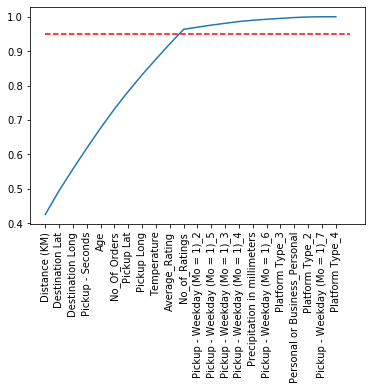

In [36]:
#first specify the x and y values
x_len = list(range(len(feature_importance)))
cumulative = np.cumsum(features_df['importance'])
x_labels = features_df['feature']


#lets plot this
plt.plot(x_len,cumulative)
plt.xticks(x_len, x_labels, rotation = 'vertical')
# lets draw the indicate significane at 95%
plt.hlines(y = 0.95, xmin=0, xmax=len(x_len), color = 'red', linestyles = 'dashed')

We can now see that not all features are as important in improving the model. We can remove features that are above the 95% threshold.

In [37]:
nb_features = np.where(cumulative > 0.95)[0][0]
print('Number of features above 95% is', nb_features)

Number of features above 95% is 10


We see that 10 features are above the 95%. We can remove these features from our dataframe and see if this improves the RF model.

In [38]:
#first get the names of variables to keep
names = list(features_df[0:nb_features]['feature'])
x_new= x[names]

In [39]:
names

['Distance (KM)',
 'Destination Lat',
 'Destination Long',
 'Pickup - Seconds',
 'Age',
 'No_Of_Orders',
 'Pickup Lat',
 'Pickup Long',
 'Temperature',
 'Average_Rating']

Now that we have our new dependant variables, lets see how it compares to the origical RF

In [40]:
#scale X variables
x_new_scaled = scaler.fit_transform(x_new)

#Change scaled variables into dataframe
x_new_standard = pd.DataFrame(x_new_scaled, columns = x_new.columns)

df_new_standard = x_new_standard.fillna(0)

x_new_train, x_new_test, y_train, y_test = (train_test_split(df_new_standard,y, test_size = 0.3, random_state = 50))

In [41]:
df_new_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 10 columns):
Distance (KM)       21201 non-null float64
Destination Lat     21201 non-null float64
Destination Long    21201 non-null float64
Pickup - Seconds    21201 non-null float64
Age                 21201 non-null float64
No_Of_Orders        21201 non-null float64
Pickup Lat          21201 non-null float64
Pickup Long         21201 non-null float64
Temperature         21201 non-null float64
Average_Rating      21201 non-null float64
dtypes: float64(10)
memory usage: 1.6 MB


In [42]:
#random forest
RF_new = RandomForestRegressor(n_estimators=100, max_depth=15,random_state = 50)

RF_new.fit(x_new_train,y_train)
y_RF_new = RF_new.predict(x_new_test)

MSE_RF_new = mean_squared_error(y_RF_new,y_test)

# Report RMSE
print("RF RMSE is:",np.sqrt(MSE_RF))
print("RF new RMSE is:",np.sqrt(MSE_RF_new))



RF RMSE is: 765.6585569448016
RF new RMSE is: 766.3338290921024


## Ridge Regression and Lasso Regression

From the above RMSE we see that our regression model does not have the best fit. Lets see if we can improve it.

In [43]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [44]:
#ridge regression for correlated data
ridge_cor = Ridge()

ridge_cor.fit(x_cor_train,y_cor_train)
y_ridge_cor_predict = ridge_cor.predict(x_cor_test)

#lasso regression
lasso_cor = Lasso(alpha = 0.01)

lasso_cor.fit(x_cor_train, y_cor_train)
y_lasso_cor_predict = lasso_cor.predict(x_cor_test)


In [45]:
#ridge regression
ridge = Ridge()

ridge.fit(x_train,y_train)
y_ridge_predict = ridge.predict(x_test)

#lasso regression
lasso = Lasso(alpha = 0.01)

lasso.fit(x_train, y_train)
y_lasso_predict = lasso.predict(x_test)


In [46]:
#lets test what the RMSE values are
from sklearn.metrics import mean_squared_error

MSE_lasso = mean_squared_error(y_lasso_predict,y_test)
MSE_ridge = mean_squared_error(y_ridge_predict,y_test)
MSE_lasso_cor = mean_squared_error(y_lasso_cor_predict,y_test)
MSE_ridge_cor = mean_squared_error(y_ridge_cor_predict,y_test)

# Report RMSE
print("Lasso Regression  RMSE is:",np.sqrt(MSE_lasso))
print("Ridge Regression  RMSE is:",np.sqrt(MSE_ridge))
print("Lasso Regression (cor)  RMSE is:",np.sqrt(MSE_lasso_cor))
print("Ridge Regression (cor)  RMSE is:",np.sqrt(MSE_ridge_cor))

Lasso Regression  RMSE is: 794.3290424798123
Ridge Regression  RMSE is: 794.3285401630883
Lasso Regression (cor)  RMSE is: 794.8897629826847
Ridge Regression (cor)  RMSE is: 794.8901159861825


Lets extraxt the model so that we can store and re-use it.

In [48]:
import pickle

In [49]:
model_saved_path = 'lasso_model.pkl'
model_saved_path_ridge = 'ridge_model.pkl'

In [50]:
with open(model_saved_path, 'wb') as file: pickle.dump(lasso, file)
with open(model_saved_path_ridge, 'wb') as file: pickle.dump(ridge, file)

## Ensamble methods

Lets use bootstrapping. We see that our RF model  model already has the best fit, so lets use this as our base model.

## Bootstrapping

In [47]:
from sklearn.ensemble import BaggingRegressor

In [48]:
rf_bag_reg = BaggingRegressor(base_estimator = RF)
rf_new_bag_reg = BaggingRegressor(base_estimator = RF_new)

ridge_bag_reg = BaggingRegressor(base_estimator = ridge)
lasso_bag_reg = BaggingRegressor(base_estimator = lasso)
lm_bag_reg = BaggingRegressor(base_estimator = lm)

rf_bag_cor_reg = BaggingRegressor(base_estimator = RF_cor)
ridge_bag_cor_reg = BaggingRegressor(base_estimator = ridge_cor)
lasso_bag_cor_reg = BaggingRegressor(base_estimator = lasso_cor)
lm_bag_cor_reg = BaggingRegressor(base_estimator = lm_cor)


In [49]:
rf_bag_reg.fit(x_train,y_train)
y_rf_bag_reg_predict = rf_bag_reg.predict(x_test)

rf_new_bag_reg.fit(x_new_train,y_train)
y_rf_new_bag_reg_predict = rf_new_bag_reg.predict(x_test)

lasso_bag_reg.fit(x_train,y_train)
y_lasso_bag_reg_predict = lasso_bag_reg.predict(x_test)

ridge_bag_reg.fit(x_train,y_train)
y_ridge_bag_reg_predict = ridge_bag_reg.predict(x_test)

lm_bag_reg.fit(x_train,y_train)
y_lm_bag_reg_predict = lm_bag_reg.predict(x_test)

rf_bag_cor_reg.fit(x_cor_train,y_cor_train)
y_rf_bag_cor_reg_predict = rf_bag_cor_reg.predict(x_cor_test)

lasso_bag_cor_reg.fit(x_cor_train,y_cor_train)
y_lasso_bag_cor_reg_predict = lasso_bag_cor_reg.predict(x_cor_test)

ridge_bag_cor_reg.fit(x_cor_train,y_cor_train)
y_ridge_bag_cor_reg_predict = ridge_bag_cor_reg.predict(x_cor_test)

lm_bag_cor_reg.fit(x_cor_train,y_cor_train)
y_lm_bag_cor_reg_predict = lm_bag_cor_reg.predict(x_cor_test)




In [50]:
MSE_rf_bag_reg = mean_squared_error(y_rf_bag_reg_predict,y_test)
MSE_lasso_bag_reg = mean_squared_error(y_lasso_bag_reg_predict,y_test)
MSE_ridge_bag_reg = mean_squared_error(y_ridge_bag_reg_predict,y_test)
MSE_lm_bag_reg = mean_squared_error(y_lm_bag_reg_predict,y_test)
MSE_rf_new_bag_reg = mean_squared_error(y_rf_new_bag_reg_predict, y_test)

MSE_rf_bag_cor_reg = mean_squared_error(y_rf_bag_cor_reg_predict,y_cor_test)
MSE_lasso_bag_cor_reg = mean_squared_error(y_lasso_bag_cor_reg_predict,y_cor_test)
MSE_ridge_bag_cor_reg = mean_squared_error(y_ridge_bag_cor_reg_predict,y_cor_test)
MSE_lm_bag_cor_reg = mean_squared_error(y_lm_bag_cor_reg_predict,y_cor_test)



# Report RMSE
print("RF Bootstrapping  RMSE is:",np.sqrt(MSE_rf_bag_reg))
print("RF new Bootstrapping  RMSE is:",np.sqrt(MSE_rf_new_bag_reg))
print("lasso Bootstrapping  RMSE is:",np.sqrt(MSE_lasso_bag_reg))
print("ridge Bootstrapping  RMSE is:",np.sqrt(MSE_ridge_bag_reg))
print("lm Bootstrapping  RMSE is:",np.sqrt(MSE_lm_bag_reg))

print("RF Bootstrapping (cor) RMSE is:",np.sqrt(MSE_rf_bag_cor_reg))
print("lasso Bootstrapping (cor) RMSE is:",np.sqrt(MSE_lasso_bag_cor_reg))
print("ridge Bootstrapping (cor) RMSE is:",np.sqrt(MSE_ridge_bag_cor_reg))
print("lm Bootstrapping (cor) RMSE is:",np.sqrt(MSE_lm_bag_cor_reg))

RF Bootstrapping  RMSE is: 759.7925064017169
RF new Bootstrapping  RMSE is: 823.7294489991507
lasso Bootstrapping  RMSE is: 794.1212399073312
ridge Bootstrapping  RMSE is: 794.7281955732784
lm Bootstrapping  RMSE is: 794.4878963307209
RF Bootstrapping (cor) RMSE is: 759.9804437002058
lasso Bootstrapping (cor) RMSE is: 794.9119132878175
ridge Bootstrapping (cor) RMSE is: 795.0544580926666
lm Bootstrapping (cor) RMSE is: 794.8222970512115


Lets save this model to use it.

In [51]:
model_saved_path_rf = 'rf_bootstrap_model.pkl'
model_saved_path_boot_lasso = 'lasso_bootstrap_model.pkl'
model_saved_path_boot_ridge = 'ridge_bootstrap_model.pkl'
model_saved_path_boot_lm = 'lm_bootstrap_model.pkl'

model_saved_path_rf_new = 'rf_new_bootstrap_model.pkl'
model_saved_path_boot_cor_rf = 'rf_cor_bootstrap_model.pkl'

In [52]:
with open(model_saved_path_boot_cor_rf, 'wb') as file: pickle.dump(rf_bag_cor_reg, file)
with open(model_saved_path_rf, 'wb') as file: pickle.dump(rf_bag_reg, file)
    

## Boosting

In [170]:
from sklearn.ensemble import AdaBoostRegressor

In [171]:
rf_bst_reg = AdaBoostRegressor(base_estimator = RF)

In [172]:
rf_bst_reg.fit(x_train,y_train)
y_rf_bst_reg_predict = rf_bst_reg.predict(x_test)

In [174]:
MSE_rf_bst_reg = mean_squared_error(y_rf_bst_reg_predict,y_test)

# Report RMSE
print("RF boosting  RMSE is:",np.sqrt(MSE_rf_bst_reg))

RF boosting  RMSE is: 883.0245766021972


From the above we saw that bootstrapping really improved the model.

## Get submission dataframe

In [ ]:
#Join train and rider datasets based on the RiderID
df_combined = pd.merge(df_test,df_riders,on='Rider Id',how='left')

#view new dataframe
df_combined.head()

In [ ]:
#remove columns
df = df_combined.drop(['Order No', 'User Id', 'Vehicle Type', 'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
                      'Placement - Time','Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)','Confirmation - Time',
                      'Arrival at Pickup - Day of Month', 'Arrival at Pickup - Weekday (Mo = 1)','Arrival at Pickup - Time',
                      'Pickup - Day of Month','Rider Id'], axis=1)

In [ ]:
#no convert pickup time to seconds
#I just want to comment that I really struggle with date times and that I am aware that this code is messy. 

from datetime import datetime
from datetime import time

time_1 = [str(x) for x in df_test['Pickup - Time']]
new_time = []
time_2 = []
time_seconds = []

for x in time_1:
    new_time.append(datetime.strptime(x, "%I:%M:%S %p"))
for x in new_time:
    time_2.append(x.time().strftime("%H:%M:%S"))
for x in time_2:  
    time_seconds.append(sum(int(x) * 60 ** i for i, x in enumerate(reversed(x.split(':')))))


In [ ]:
#add new column to df with seconds
df['Pickup - Seconds'] = time_seconds
df_clean = df.drop('Pickup - Time', axis = 1)
df_clean.head()

In [ ]:
#change datatypes to catagorical type

df_clean['Platform Type'] = df_clean['Platform Type'].apply(str)
df_clean['Personal or Business'] = df_clean['Personal or Business'].astype(str)
df_clean['Pickup - Weekday (Mo = 1)'] = df_clean['Pickup - Weekday (Mo = 1)'].astype(str)

#now let see how it changed
df_clean.info()

In [ ]:
#we also want to ensure that all nans are filled with 0
df_clean = df_clean.fillna(0)

#lets create dummy variables for all our dataframe
#remember to use the drop_first = True to ensure that we can create n-1 for each dummy variable
df_dummies = pd.get_dummies(df_clean, drop_first = True)

#lets view the head of this dummy dataframe
df_dummies.head()

In [ ]:
scaler = StandardScaler()

x = df_dummies

#scale X variables
x_train_scaled = scaler.fit_transform(x)

#Change scaled variables into dataframe
x_standard = pd.DataFrame(x_train_scaled, columns = x.columns)

In [ ]:
import pickle

In [ ]:
model_saved_path = 'lasso_model.pkl'

In [ ]:
with open(model_saved_path, 'rb') as file:lasso = pickle.load(file)

In [ ]:
model_saved_path_ridge = 'ridge_model.pkl'

In [ ]:
with open(model_saved_path_ridge, 'rb') as file:ridge = pickle.load(file)

In [ ]:
model_saved_path_rf = 'rf_model.pkl'

In [ ]:
with open(model_saved_path_rf, 'rb') as file:rf = pickle.load(file)

In [ ]:
y_pred_lasso = lasso.predict(x_standard)
y_pred_ridge = ridge.predict(x_standard)
y_pred_rf = rf.predict(x_standard)

In [ ]:
Order_No = df_test['Order No']

In [ ]:
lasso_final_df = pd.DataFrame()

lasso_final_df['Order_No'] = Order_No
lasso_final_df['Time from Pickup to Arrival'] = y_pred_lasso

ridge_final_df = pd.DataFrame()

ridge_final_df['Order_No'] = Order_No
ridge_final_df['Time from Pickup to Arrival'] = y_pred_ridge

rf_final_df = pd.DataFrame()

rf_final_df['Order_No'] = Order_No
rf_final_df['Time from Pickup to Arrival'] = y_pred_rf

In [ ]:
lasso_final_df.to_csv(r'lasso_zindi_sumbmission.csv', index = False)
ridge_final_df.to_csv(r'ridge_zindi_sumbmission.csv', index = False)
rf_final_df.to_csv(r'rf_zindi_sumbmission.csv', index = False)

In [ ]:
#lets use the bootstrapped model
model_saved_path = 'rf_bootstrap_model.pkl'
with open(model_saved_path, 'rb') as file:rf_bootstrap = pickle.load(file)

In [ ]:
y_pred_boot = rf_bootstrap.predict(x_standard)
bootstrap_final_df = pd.DataFrame()

bootstrap_final_df['Order_No'] = Order_No
bootstrap_final_df['Time from Pickup to Arrival'] = y_pred_boot

bootstrap_final_df.head()

In [ ]:
bootstrap_final_df.to_csv(r'rf_boot_zindi_sumbmission.csv', index = False)